In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [80]:
data1 = pd.read_feather("/Users/weilu/Research/server/aug_2018/02_week/freeEnergy/all_data_folder/labelrerun_4_16_Aug_201552.feather")
data2 = pd.read_feather("/Users/weilu/Research/server/aug_2018/02_week/freeEnergy/all_data_folder/labelrerun_5_16_Aug_201552.feather")
data3 = pd.read_feather("/Users/weilu/Research/server/aug_2018/02_week/freeEnergy/all_data_folder/labelrerun_6_16_Aug_201635.feather")
data4 = pd.read_feather("/Users/weilu/Research/server/aug_2018/02_week/freeEnergy/all_data_folder/labelrerun_7_16_Aug_201635.feather")

In [81]:
data = pd.concat([data1,data2,data3,data4])

In [82]:
dic = {"T0":300, "T1":335, "T2":373, "T3":417, "T4":465, "T5":519, "T6":579, "T7":645, "T8":720, "T9":803, "T10":896, "T11":1000}

data["TempT"] = data["Temp"].apply(lambda x: dic[x])
data["BiasTo"] = data["BiasTo"].apply(pd.to_numeric)

In [83]:
save_data = data.query("TempT <= 417")
chosen = save_data.query("not ((BiasTo == 100.0 or BiasTo == 106.0) and Step <= 6e7)")

In [84]:
chosen.columns = chosen.columns.str.strip()

In [85]:
chosen.reset_index().to_feather("/Users/weilu/Research/server/aug_2018/02_week/freeEnergy/all_data_folder/include_h14_aug18.feather")

In [86]:
chosen.shape

(1400000, 48)

In [91]:
chosen

,Step,Run,Temp,Qw,Energy,DisReal,Dis_h56,Dis_h12,Dis_h34,z_average,...,Lipid9,Lipid10,Lipid11,Lipid12,Lipid13,Lipid14,Lipid15,TotalE,BiasTo,TempT
2,40004000,2,T2,0.140180,-711.707879,144.708940,69.781271,14.944107,60.970334,-12.214930,...,0.000103,9.934604e-11,1.571177e-10,8.128362e-12,1.321546e-04,1.876596e-07,9.906222e-05,-713.500279,154.0,373
3,40004000,3,T1,0.149747,-783.670958,149.101952,66.652354,15.125225,78.342728,-12.502948,...,0.000053,3.502296e-13,2.644780e-08,1.571675e-09,5.087124e-09,3.023050e-10,2.282875e-05,-784.901256,154.0,335
6,40004000,6,T0,0.132641,-828.826346,142.869187,66.214056,13.473236,75.530439,-10.780254,...,0.000007,5.548324e-09,1.154264e-06,2.283946e-08,1.740215e-05,5.449429e-09,1.133691e-06,-830.365418,154.0,300
11,40004000,11,T3,0.132584,-596.192621,150.066565,66.759818,16.756575,79.888166,-12.705062,...,0.000043,4.392087e-13,2.039428e-08,9.080129e-10,3.326615e-07,4.440192e-10,2.061765e-05,-598.002860,154.0,417
14,40008000,2,T2,0.123968,-691.195590,154.711894,69.646010,22.418261,68.066145,-10.445594,...,0.000203,1.090174e-11,3.705993e-10,3.669914e-11,7.051735e-04,4.124631e-07,2.053185e-04,-692.285939,154.0,373
15,40008000,3,T1,0.153474,-799.315081,160.000681,68.617129,8.746308,74.947723,-11.461473,...,0.000018,3.185255e-12,2.894876e-07,7.190074e-09,2.781553e-09,6.908610e-11,6.278797e-06,-800.592753,154.0,335
18,40008000,6,T0,0.125509,-798.081370,150.106381,66.651626,8.425028,79.590014,-9.615588,...,0.000008,2.336961e-08,1.939040e-05,8.772754e-08,3.086063e-05,8.016231e-09,6.651287e-06,-798.726183,154.0,300
23,40008000,11,T3,0.137473,-609.383603,146.046148,68.689535,13.937725,82.348475,-11.717372,...,0.000003,7.165527e-13,1.572877e-07,3.187303e-10,4.630028e-09,9.382360e-12,2.059486e-06,-610.616070,154.0,417
26,40012000,2,T2,0.124142,-649.455431,145.154715,64.195638,22.793577,69.985766,-10.831080,...,0.000069,3.723976e-13,2.895950e-09,9.528426e-11,2.840217e-05,8.800080e-09,1.075262e-03,-651.495130,154.0,373
27,40012000,3,T1,0.143983,-775.392560,154.217178,70.418173,15.104489,70.761005,-11.581905,...,0.000014,1.144590e-09,1.531694e-06,1.412354e-08,1.194543e-08,1.101472e-10,1.012369e-05,-776.969559,154.0,335


In [90]:
a

,Step,Run,Temp,Qw,Energy,DisReal,Dis_h56,Dis_h12,Dis_h34,z_average,...,Lipid9,Lipid10,Lipid11,Lipid12,Lipid13,Lipid14,Lipid15,TotalE,BiasTo,TempT
0,70004000,0,T2,0.344891,-714.949919,79.004676,28.346208,56.287371,15.436497,-1.033087,...,0.234694,-1.337732e+00,6.655914e-01,-2.050805e+00,-1.839279e+00,-2.145211e+00,1.020202e-01,-725.288756,86.0,373
1,70004000,2,T0,0.374740,-863.891967,76.611795,26.503922,69.551603,10.654753,-0.743387,...,-0.301533,-1.677543e+00,5.288776e-01,-2.167341e+00,-1.493340e+00,-2.136691e+00,-4.302086e-02,-875.678992,86.0,300
2,70004000,9,T3,0.344723,-629.877271,77.891836,27.000805,60.686861,18.767852,-1.308511,...,-0.318037,-1.650612e+00,4.250447e-01,-2.132697e+00,-2.079390e+00,-2.150774e+00,-9.006130e-01,-643.118859,86.0,417
3,70004000,11,T1,0.367796,-808.283812,76.310309,23.970832,75.328088,13.095073,-0.404976,...,-0.280362,-1.567137e+00,4.305658e-01,-2.141017e+00,-1.844642e+00,-2.146233e+00,-5.750738e-01,-820.881666,86.0,335
4,70008000,0,T2,0.329076,-722.068300,83.372854,18.937570,62.469965,9.050536,-2.802593,...,0.404635,-1.849445e+00,7.370681e-01,-2.022072e+00,-1.579770e+00,-2.115825e+00,-6.024791e-02,-731.938551,86.0,373
5,70008000,2,T0,0.397362,-875.315412,77.138549,23.965611,75.622204,14.063383,-2.526055,...,-0.101940,-1.371076e+00,5.344056e-01,-1.952150e+00,-1.773872e+00,-2.060829e+00,-9.143701e-02,-886.647456,86.0,300
6,70008000,9,T3,0.302283,-617.038543,81.804196,22.570860,61.130070,17.492424,-2.516296,...,-0.068481,-1.179792e+00,6.056163e-01,-1.775826e+00,-1.982049e+00,-2.033298e+00,-8.230895e-01,-628.288762,86.0,417
7,70008000,11,T1,0.360861,-815.887543,79.692817,24.642406,83.003807,14.052843,-2.113954,...,-0.343627,-1.541651e+00,6.137675e-02,-1.977171e+00,-1.935761e+00,-2.087915e+00,-5.041639e-01,-829.372231,86.0,335
8,70012000,0,T2,0.316504,-709.820249,89.521842,22.380344,64.204071,15.845671,-2.171087,...,0.193872,-1.345055e+00,6.011608e-01,-1.725563e+00,-1.806137e+00,-2.113358e+00,-1.260594e-01,-720.532338,86.0,373
9,70012000,2,T0,0.387002,-871.712350,80.956135,25.333072,75.196087,11.012050,-1.968650,...,0.044966,-1.522707e+00,4.805584e-01,-2.167369e+00,-1.694709e+00,-2.087979e+00,-5.324184e-01,-882.323374,86.0,300


In [89]:
a.shape

(1400000, 48)

In [88]:

a = pd.read_feather("/Users/weilu/Research/server/aug_2018/02_week/freeEnergy/all_data_folder/include_h14.feather")

In [78]:
a["Step"]

0          50004000
1          50004000
2          50004000
3          50004000
4          50008000
5          50008000
6          50008000
7          50008000
8          50012000
9          50012000
10         50012000
11         50012000
12         50016000
13         50016000
14         50016000
15         50016000
16         50020000
17         50020000
18         50020000
19         50020000
20         50024000
21         50024000
22         50024000
23         50024000
24         50028000
25         50028000
26         50028000
27         50028000
28         50032000
29         50032000
             ...   
1399970    79972000
1399971    79972000
1399972    79976000
1399973    79976000
1399974    79976000
1399975    79976000
1399976    79980000
1399977    79980000
1399978    79980000
1399979    79980000
1399980    79984000
1399981    79984000
1399982    79984000
1399983    79984000
1399984    79988000
1399985    79988000
1399986    79988000
1399987    79988000
1399988    79992000


# without subsampling, they are the same

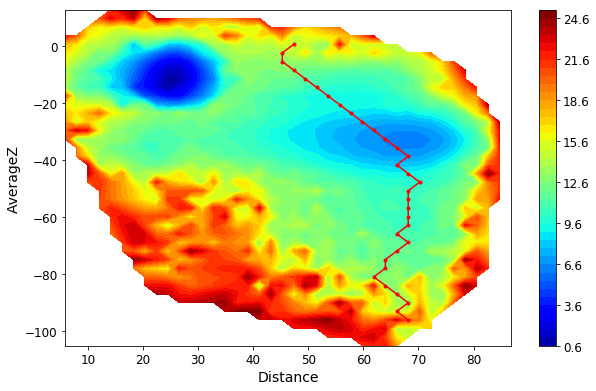

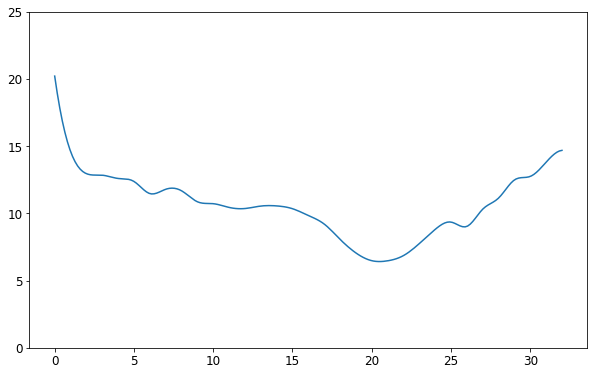

In [60]:
pre = "/Users/weilu/Research/server/aug_2018/02_week/freeEnergy"
temp = 340
location = pre + "/combined_more_force_fix_order/_280-350/56_z_dis/no_subsample/"
location2 = location + f"pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin_second = shortest_path_2(location2, start=(35,20), end=(3, 30), title="AverageZ_Dis",save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

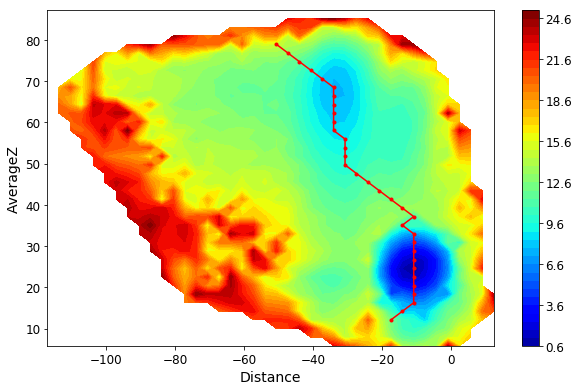

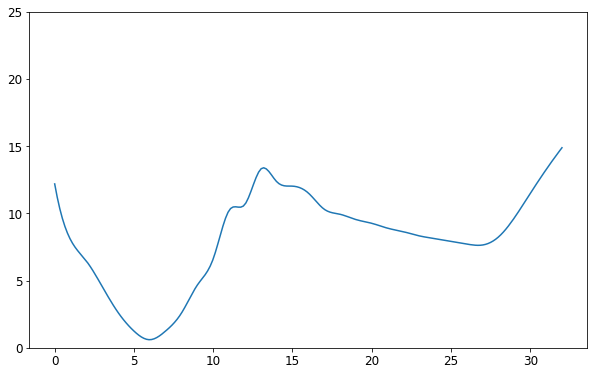

In [59]:
pre = "/Users/weilu/Research/server/aug_2018/02_week/freeEnergy"
temp = 340
location = pre + "/combined_more_rc/_280-350/56_z_dis/no_subsample/"
location2 = location + f"pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin_second = shortest_path_2(location2, start=(35,20), end=(3, 30), title="AverageZ_Dis",save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

# seems complicate. maybe I should use Dis instead of Dis56.

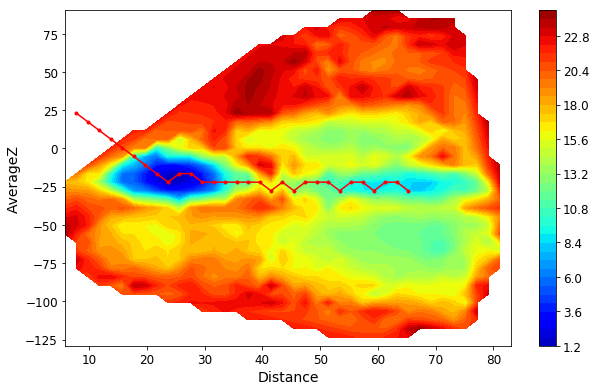

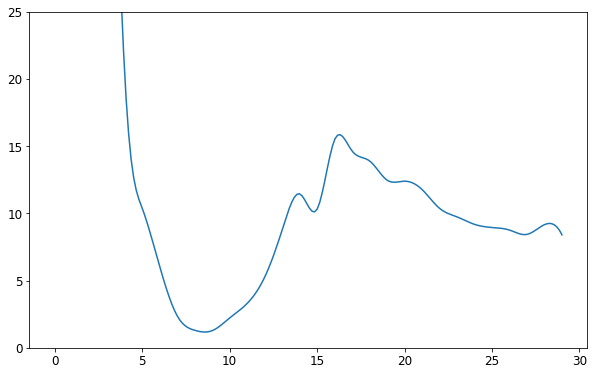

In [33]:
pre = "/Users/weilu/Research/server/aug_2018/02_week/freeEnergy"
temp = 370
location = pre + "/combined_more_rc/_280-350/2d_dis56_z14/force_0.1/"
location2 = location + f"perturbation-1-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin_second = shortest_path_2(location2, start=(18, 30), title="AverageZ_Dis", end=(27,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

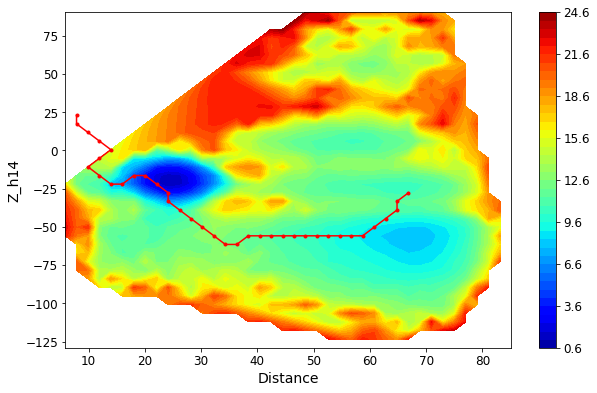

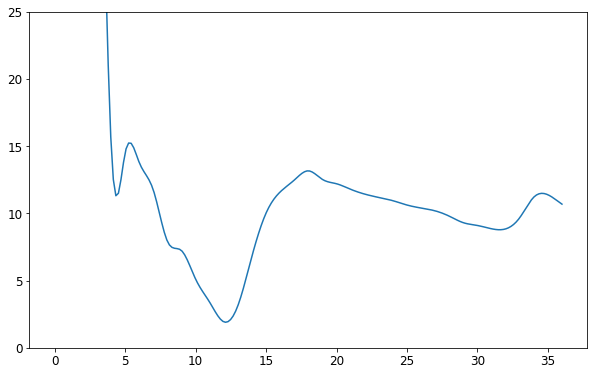

In [54]:
pre = "/Users/weilu/Research/server/aug_2018/02_week/freeEnergy"
temp = 340
location = pre + "/combined_more_rc/_280-350/2d_dis56_z14/force_0.1/"
location2 = location + f"pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin_second = shortest_path_2(location2, start=(18, 30), title="AverageZ_Dis", end=(27,1),save=False, xlabel="Distance", ylabel="Z_h14", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

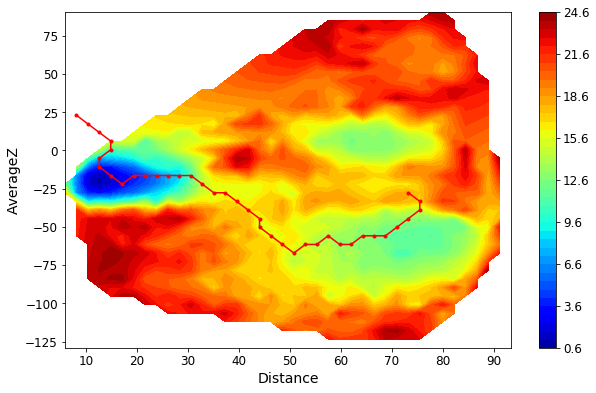

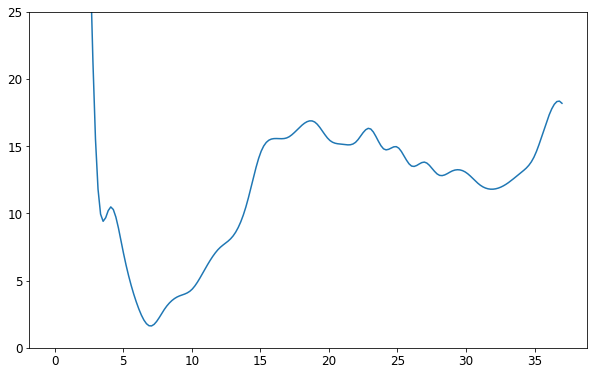

In [34]:
pre = "/Users/weilu/Research/server/aug_2018/02_week/freeEnergy"
temp = 370
location = pre + "/combined_more_rc/_280-350/2d_dis34_z14/force_0.1/"
location2 = location + f"perturbation-1-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin_second = shortest_path_2(location2, start=(18, 30), title="AverageZ_Dis", end=(27,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)

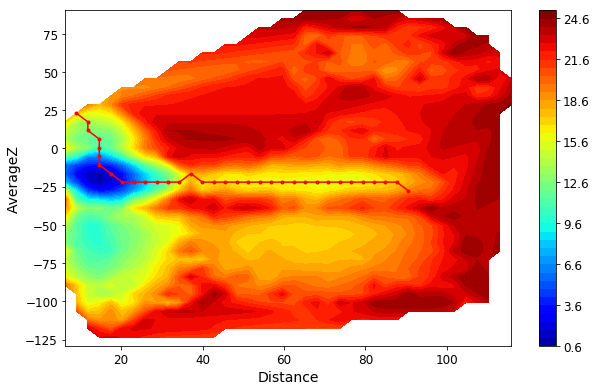

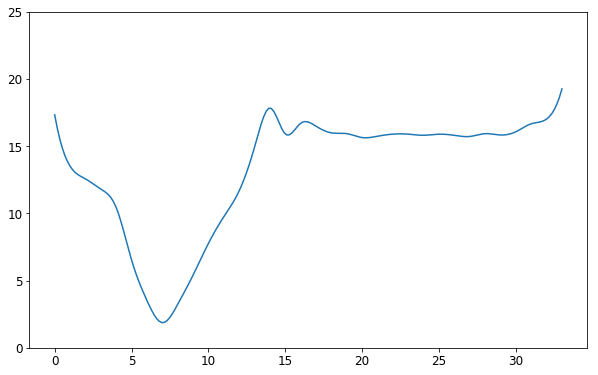

In [35]:
pre = "/Users/weilu/Research/server/aug_2018/02_week/freeEnergy"
temp = 370
location = pre + "/combined_more_rc/_280-350/2d_dis12_z14/force_0.1/"
location2 = location + f"perturbation-1-pmf-{temp}.dat"
zmax=25
res=40
path_origin, f_origin_second = shortest_path_2(location2, start=(18, 30), title="AverageZ_Dis", end=(27,1),save=False, xlabel="Distance", ylabel="AverageZ", zmax=zmax,res=res)
# print(getBound(location2, res=res, zmax=zmax))
xmin,xmax,ymin,ymax = getBound(location2, res=res, zmax=zmax)